In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess

+ Necessary module: pandas, numpy(sometimes), matplotlib\seaborn(visualization)
+ Going through the dtypes before dealing with data

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
%matplotlib inline

In [5]:
dataset=pd.read_csv('Admission_Predict.csv')

In [6]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


+ df.describe() can show the basic statistic discription

In [7]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


+ df.dtypes shows the type data. Not callable so without '()'

In [8]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
Features=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']

In [10]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

+ seaborn is a convenient and sharp tool on showing data via graphs and it is based on matplotlib

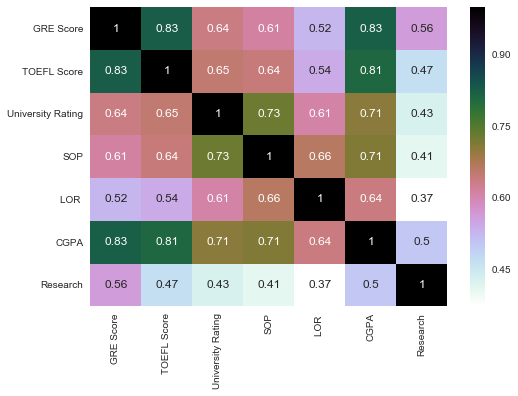

In [11]:
sns.set()
sns.heatmap(dataset[Features].corr(),annot=True,cmap='cubehelix_r')

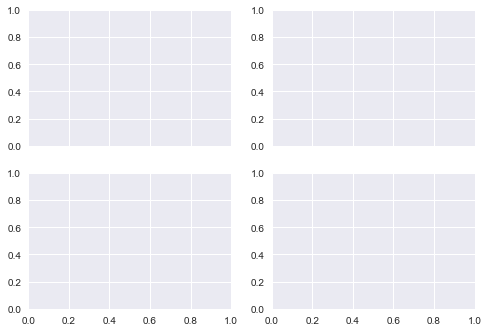

In [39]:
fig,axes=plt.subplots(2,2,sharex=True)
#dataset['University Rating'].plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
#Ur=pd.Series(dataset['University Rating'],index=[1,2,3,4,5])

In [40]:
axes[0,0].hist(dataset['University Rating'],bins=30)
axes[0,1].hist(dataset['SOP'],bins=30)
axes[1,0].hist(dataset['LOR'],bins=30)

(array([ 1.,  0.,  0., 11.,  0.,  0.,  0., 46.,  0.,  0.,  0., 50.,  0.,
         0.,  0., 99.,  0.,  0., 86.,  0.,  0.,  0., 94.,  0.,  0.,  0.,
        63.,  0.,  0., 50.]),
 array([1.        , 1.13333333, 1.26666667, 1.4       , 1.53333333,
        1.66666667, 1.8       , 1.93333333, 2.06666667, 2.2       ,
        2.33333333, 2.46666667, 2.6       , 2.73333333, 2.86666667,
        3.        , 3.13333333, 3.26666667, 3.4       , 3.53333333,
        3.66666667, 3.8       , 3.93333333, 4.06666667, 4.2       ,
        4.33333333, 4.46666667, 4.6       , 4.73333333, 4.86666667,
        5.        ]),
 <a list of 30 Patch objects>)

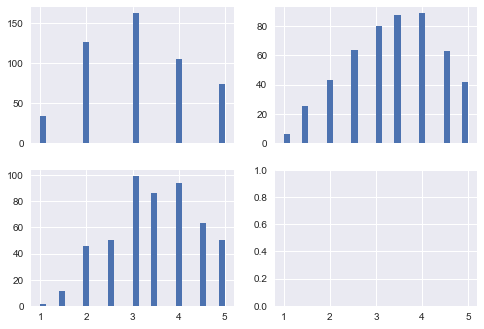

In [41]:
fig

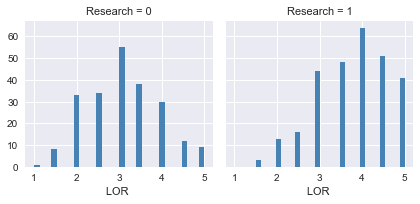

In [43]:
sns.set(style="darkgrid")
g=sns.FacetGrid(dataset,col="Research",margin_titles=True)
g.map(plt.hist,"LOR ",color="steelblue",bins=30)

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
enc=OneHotEncoder()

In [64]:
onehot_features='University Rating'
enc.fit(dataset[onehot_features].values.reshape(-1,1)) #single col solution
enc_res=enc.transform(dataset[onehot_features].values.reshape(-1,1))

In [65]:
enc_res.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [69]:
final_features=list(set(Features)-set([onehot_features]))
onehot=pd.DataFrame(enc_res.toarray())
dataset_1=pd.concat([dataset[final_features],onehot],axis=1)
dataset_1.columns

Index(['CGPA', 'TOEFL Score', 'SOP', 'Research', 'LOR ', 'GRE Score', 0, 1, 2,
       3, 4],
      dtype='object')

In [80]:
from sklearn.linear_model import LinearRegression

In [83]:
from sklearn.metrics import r2_score

In [55]:
from sklearn.model_selection import KFold

In [72]:
X=dataset_1
Y=dataset['Chance of Admit ']

In [74]:
kf=KFold(n_splits=10, shuffle=True)

In [88]:
test_r2_score=[0 for i in range(10)]
train_r2_score=[0 for i in range(10)]
idx=0

In [89]:
for train_index,test_index in kf.split(X=dataset_1): #return splited data index so using iloc to locate the data
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test=Y.iloc[train_index],Y.iloc[test_index]
    
    clf=LinearRegression().fit(X_train,Y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    
    test_r2_score[idx]=r2_score(Y_test,y_test_pred)
    train_r2_score[idx]=r2_score(Y_train,y_train_pred)
    
    idx+=1


In [92]:
print(np.mean(test_r2_score))

0.8098304200910926


In [93]:
print(np.mean(train_r2_score))

0.8237873783904706
